# Name - Samyak Jain
# Student Id - 47688408

In [ ]:
#Mounting Google Drive so as to read dataset csv file from Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Analysis of Yelp Data


The Yelp dataset is a collection of user-generated reviews and associated data for businesses in various cities. The data includes information such as the business name, category, location, and rating, as well as the user ID and review text for each review. This data can be used to analyze patterns and trends in consumer behavior, business performance, and geographic locations. Additionally, the dataset provides an opportunity to explore the relationships between different variables, such as ratings, reviews, and business categories. This data can be leveraged to gain insights and make informed decisions in a variety of industries, including marketing, business management, and public policy.

Description of the variables of the data used here.

* __business_id__ - A unique identifier for each business in the dataset
* __business_categories__ - A list of categories associated with the business
* __business_city__ - The city where the business is located.
* __user_id__ - A unique identifier for each user who has written a review.
* __text__ - The text of the review.
* __stars__ - The user's rating towards the business
* __useful__ - The number of times the review was voted as useful.
* __date__ - The date the review was posted.

 # Q1. Check and remove missing data
 
### Q1.1 Write a Python code snippet that checks for missing values in each column of the dataset. If any, only display the names of the columns with missing values and their corresponding number of missing values. Print the length of the data before removing the missing data.

Note: Only output the number of missing values for the columns having at least one missing value!

In [ ]:
#Importing libraries
import pandas as pd
import random
import matplotlib.pyplot as plt

In [ ]:
#Reading dataset csv file from Google Drive
yelp = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Yelp_Portfolio1_Input.csv')

In [ ]:
#Length(number of rows) of the data before removing missing values
print("Length of the data  set is:",len(yelp))

Length of the data  set is: 229907


In [ ]:
#Display names of columns with missing values and their corresponding number of missing values

for col in yelp.columns: # For each column in dataset
  if yelp[col].isnull().any(): #For any column, is there is atleast 1 missing value, then run below code
    print(f"Column name: {col}" + ", " + f"Missing values:{yelp[col].isnull().sum()}") #Printing Column name and its corresponding missing values

Column name: business_categories, Missing values:777
Column name: text, Missing values:6


### Q1.2 Remove any row that contains at least one missing value, and output the length of the resulting cleaned dataset; After that, remove any row that contain invalid value with either "#NAME?" or "#VALUE!" in the `business_id` and `user_id` columns, and output the length of the resulting cleaned dataset.

In [ ]:
#Remove any row that contains at least one missing value
yelp_notnull = yelp.dropna(axis = 0)

In [ ]:
#Output the length of the resulting cleaned dataset
print("Length of the dataset after removing missing values is:",len(yelp_notnull))

Length of the dataset after removing missing values is: 229124


In [ ]:
#Removing rows having either #NAME? or #VALUE! as value in business id and user id columns
cleaned_yelp = yelp_notnull.loc[~((yelp_notnull['business_id'] == "#NAME?") | (yelp_notnull['user_id'] == "#NAME?")|(yelp_notnull['business_id'] == "#VALUE!") | (yelp_notnull['user_id'] == "#VALUE!"))]
print("Lenght of cleaned dataset:",len(cleaned_yelp))


Lenght of cleaned dataset: 222759


# Q2. Random Subset Selection of Yelp Businesses by City

Selecting a random subset of cities from the Yelp business dataset and extracting all the rows corresponding to businesses located in those cities can be useful for various purposes. For example, it can be used to 
perform exploratory data analysis on a smaller subset of the dataset, which can be more manageable and faster to process than the entire dataset. Suppose you want to select a random subset of 10 cities from the dataset and extract all the rows that correspond to businesses located in those cities. At last, print the length of the resulting sample data. Write Python code that accomplishes this task.

Note: Use the $random.sample()$ function to select 10 random cities from the list of unique cities. Set the random seed to 42 before selecting the cities!!!

In [ ]:
#Displaying first 5 rows of cleaned dataset
cleaned_yelp.head()

,business_categories,business_city,business_id,date,stars,text,useful,user_id
0,Breakfast & Brunch; Restaurants,Phoenix,9yKzy9PApeiPPOUJEtnvkg,26/1/2011,5,My wife took me here on my birthday for breakf...,5,rLtl8ZkDX5vH5nAx9C3q5Q
1,Italian; Pizza; Restaurants,Phoenix,ZRJwVLyzEJq1VAihDhYiow,27/7/2011,5,I have no idea why some people give bad review...,0,0a2KyEL0d3Yb1V6aivbIuQ
2,Middle Eastern; Restaurants,Tempe,6oRAC4uyJCsJl1X0WZpVSA,14/6/2012,4,love the gyro plate. Rice is so good and I als...,1,0hT2KtfLiobPvh6cDC8JQg
3,Active Life; Dog Parks; Parks,Scottsdale,_1QQZuf4zZOyFCvXc0o6Vg,27/5/2010,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",2,uZetl9T0NcROGOyFfughhg
4,Tires; Automotive,Mesa,6ozycU1RpktNG2-1BroVtw,5/1/2012,5,General Manager Scott Petello is a good egg!!!...,0,vYmM4KTsC8ZfQBg-j5MWkw


In [ ]:
#Getting unique cities count
print(f"Number of unique cities is {len(cleaned_yelp['business_city'].unique())}")

Number of unique cities is 61


In [ ]:
#Storing the list of unique cities  in the variable names unique_cities
unique_cities = cleaned_yelp['business_city'].unique().tolist()

In [ ]:
#Setting the state to number 42, so as to get the same result everytime
random.seed(42)

#Selecting 10 random cities from a list of unique cities
unique_10 = random.sample(unique_cities,10)


In [ ]:
#Storing a sample subset of 10 unique cities data in the variable named 'sample_data'
sample_data = cleaned_yelp.loc[cleaned_yelp['business_city'].isin(unique_10)]

In [ ]:
# Length of the resulting sample data
print("Length of subset of 10 cities:", len(sample_data))

Length of subset of 10 cities: 38654


# Q3. Descriptive statistics on the data output from Q2
### Q3.1 Compute summary statistics for the `stars` column of the sample data
Note: the resulting output includes the count, mean, standard deviation, minimum, maximum values of the column.

In [ ]:
stars_summary = sample_data['stars'].describe()
print(f"Summary statistics for the 'stars' column: {stars_summary}")

Summary statistics for the 'stars' column: count    38654.000000
mean         3.707922
std          1.240872
min          1.000000
25%          3.000000
50%          4.000000
75%          5.000000
max          5.000000
Name: stars, dtype: float64


### Q3.2 For each city in the dataframe, how many unique businesses are there?

Note: the resulting dataframe has two columns: `business_city` and `count`. Compute summary statistics (similar as Q 3.1) for the `count` column.

In [ ]:
#tabulate to print data into tabular form
from tabulate import tabulate 

# Compute the number of unique businesses for each city
# Groupby method is used to group DataFrame df by 'business_city' column and compute the number of unique businesses in each group using the nunique() method.
unique_businesses = yelp.groupby('business_city')['business_id'].nunique().reset_index() 

# Rename the columns
unique_businesses.columns = ['business_city', 'count']

# Print the resulting dataframe
print(f"Number of unique businesses for each city:\n")
print(tabulate(unique_businesses, headers = ['business_city', 'count']))

Number of unique businesses for each city:

    business_city       count
--  ----------------  -------
 0  Ahwatukee               4
 1  Anthem                 34
 2  Apache Junction        46
 3  Avondale              129
 4  Buckeye                31
 5  Carefree               20
 6  Casa Grande            48
 7  Cave Creek             65
 8  Chandler              856
 9  Charleston              1
10  Coolidge                5
11  El Mirage              11
12  Florence               10
13  Fort McDowell           7
14  Fountain Hills         47
15  Fountain Hls            2
16  Gila Bend              10
17  Gilbert               432
18  Glendale              600
19  Glendale Az             1
20  Gold Canyon            13
21  Goldfield               1
22  Good Year               1
23  Goodyear              122
24  Grand Junction          1
25  Guadalupe               4
26  Higley                  6
27  Laveen                 22
28  Litchfield Park        26
29  Maricopa              

In [ ]:
# Compute summary statistics for the "count" column
count_summary = unique_businesses['count'].describe()

# Print the summary statistics
print(f"Summary statistics for the 'count' column:\n{count_summary}")

Summary statistics for the 'count' column:
count      61.000000
mean      186.786885
std       607.491485
min         1.000000
25%         2.000000
50%         8.000000
75%        47.000000
max      4091.000000
Name: count, dtype: float64


### Q3.3 For each business category and business ID combination in the dataframe, how many unique users have rated the business?

Note: the resulting dataframe has three columns: `business_categories`, `business_id`, and `count`. Compute summary statistics (similar as Q 3.1) for the `count` column.

In [ ]:
#Calculating the count of unique users who have rated each business in each category
category_counts = yelp.groupby(['business_categories', 'business_id'])['user_id'].nunique().reset_index()

#Renaming the columns
category_counts.columns = ['business_categories', 'business_id', 'count']

#sSummary statistics for the "count" column
count_summary = category_counts['count'].describe()

#Print the category counts and summary statistics
print(f"Number of unique users who have rated each business in each category: {len(category_counts)}")

print(f"\nSummary statistics for the 'count' column:\n{count_summary}")


Number of unique users who have rated each business in each category: 11316

Summary statistics for the 'count' column:
count    11316.000000
mean        20.168257
std         43.084559
min          2.000000
25%          4.000000
50%          6.000000
75%         17.000000
max        833.000000
Name: count, dtype: float64


# Q4. Plotting and Analysis

Explore the distribution of each variable, or the correlation between the `business_city`, `useful`,`business_categories` or `other variables` and the `stars` column in both the cleaned dataset from Q1 and the sampled dataset from Q2. For instance, does some cities tend to provide higher stars than others? Hint: you may use the boxplot function to plot figures for comparison (___Challenge___).
    
You may need to select the most suitable graphic forms for ease of presentation. Most importantly, for each figure or subfigure, please summarise ___what each plot shows___ (i.e. observations and explanations). Finally, you may need to provide an overall summary of the Yelp data.

Analysis and observation are open, and require you to think critically and analyze data to develop your own insights and conclusions. It's important for you to analyze the data, identify patterns, draw your own conclusions, and communicate your findings. This fosters critical thinking skills, ownership of learning, and a deeper understanding of the data.

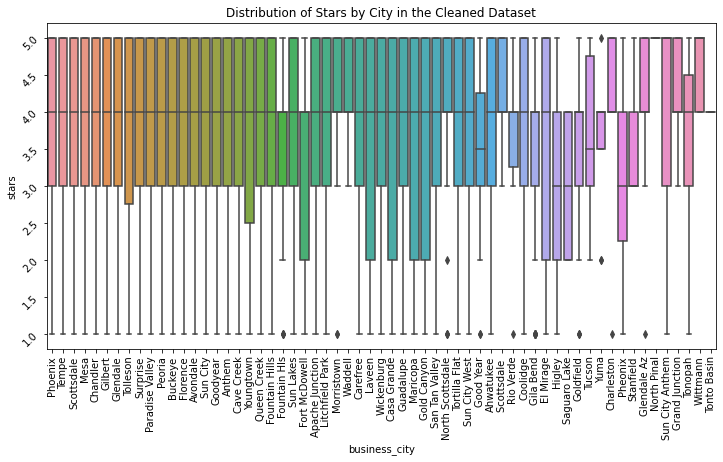

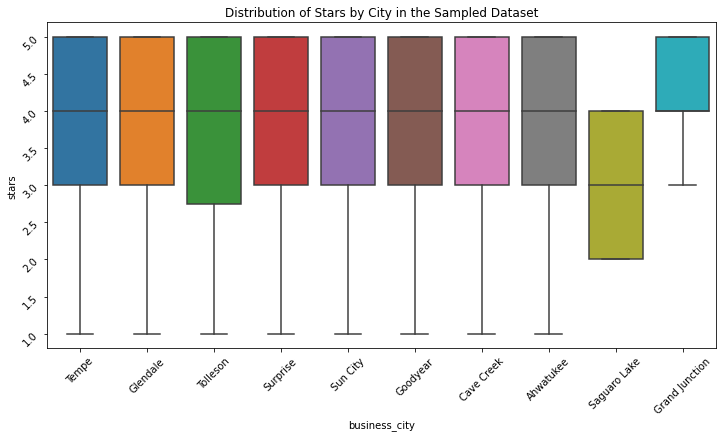

In [ ]:
# Box plot of stars by business_city in the cleaned dataset
plt.figure(figsize=(12,6))
sns.boxplot(x='business_city', y='stars', data=cleaned_yelp)
plt.title("Distribution of Stars by City in the Cleaned Dataset")
plt.xticks(rotation=90)
plt.yticks(rotation = 45)
plt.show()

# Box plot of stars by business_city in the sampled dataset
plt.figure(figsize=(12,6))
sns.boxplot(x='business_city', y='stars', data=sample_data)
plt.title("Distribution of Stars by City in the Sampled Dataset")
plt.xticks(rotation=45)
plt.yticks(rotation = 45)
plt.show()

#Analysis of above graph
The above box plots shows the distribution of stars for different business cities.

The first box plot is about the distribution of stars by business cities in the cleaned dataset. We can observe that most of the cities have median stars around 4.0. Moreover, some cities are having higher stars than other cities.

The second box plot is about the distribution of stars by business cities in the sampled dataset.We can observe that except the 'Saguar Lake' city, all cities have median 4.0 stars




We can take advantage of scatter plots to explore the correlation between different variables and the "stars" column and to visualize the relationship between the variables. 

Below is an example of how we can leverage scatter plots to explore the correlation between the "useful" variable and the "stars" column in both the cleaned dataset and the sampled dataset:

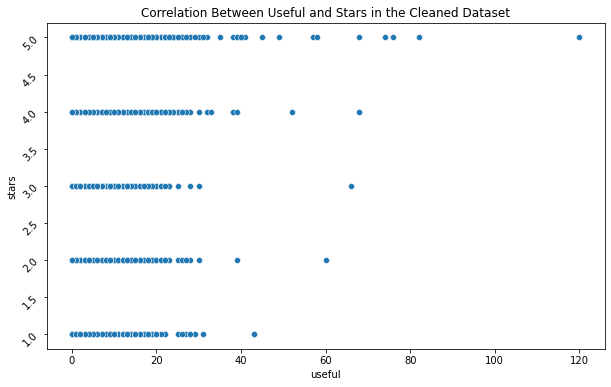

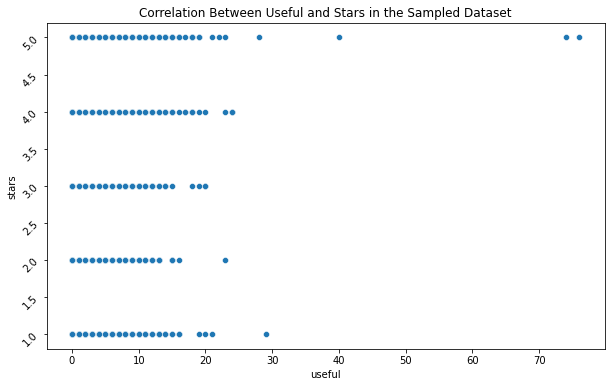

In [ ]:
# Scatter plot between stars and useful in the cleaned dataset
plt.figure(figsize=(10,6))
sns.scatterplot(x='useful', y='stars', data=cleaned_yelp)
plt.title("Correlation Between Useful and Stars in the Cleaned Dataset")
# plt.xticks(rotation=90)
plt.yticks(rotation = 45)

plt.show()

# Scatter plot between stars and useful in the sample dataset
plt.figure(figsize=(10,6))
sns.scatterplot(x='useful', y='stars', data=sample_data)
plt.title("Correlation Between Useful and Stars in the Sampled Dataset")
# plt.xticks(rotation=90)
plt.yticks(rotation = 45)

plt.show()

In [ ]:
correlation = cleaned_yelp['stars'].corr(cleaned_yelp['useful'])
print(f"Correlation between stars and useful: {correlation:.2f}")

Correlation between stars and useful: -0.03


A negative correlation coefficient of -0.03 between stars and useful suggests that there is a weak negative correlation between these two variables. This implies that as the number of useful votes increases for a business, the average star rating tends to decrease slightly. Since the correlation is weak, so this relationship is not very strong or have any strong significance. 

# Summary

By using various graphical representations such as box plots and scatter plots, we explored the distribution of each variable and their correlation with the 'stars' column in the Yelp dataset. 

The analysis involved several steps from loading, cleaning the dataset by removing nulll and invalid values. 

For exploratory data analysis, a sample data was selected to calculate summary statistics for several variables, including stars and useful.

The main findings from analysing Yelp dataset was the presence of weak negative correlation between the stars and useful variables. This suggests that businesses with higher ratings may not necessarily be more useful to users.
This will help users to choose the right businesess accordingly.

Moreover, some cities tended to have higher ratings than others, indicating that there may be differences in the quality of businesses across different cities.